In [258]:
import h5py
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [285]:
file_path = 'D:\\LSM_data_set\\20240119_OM_privat-19-02.h5'
group_key = '19549d29-64b0-45a8-8ed3-bb689c11f384'      # other key= 16aa1678-a581-4dfa-a91e-17f48bdfd4d3

# Open the HDF5 file
with h5py.File(file_path, 'r') as hdf:
    group = hdf[group_key]
    data_dict = {}
        
    for dataset_key in group.keys():
        data_dict[dataset_key] = group[dataset_key][:]

    block0_values = data_dict['block0_values']
    df = pd.DataFrame(block0_values)

    column_names = [item.decode('utf-8') for item in data_dict['block0_items']]
    df.columns = column_names
    
    timestamp = pd.to_datetime(data_dict['axis1'], unit='ns')
    df.index = timestamp
    
    df['temp_C'] = df['t2m'] - 273.15
    df['kW'] = df['w'] / 1000
    window_size = 96  # Size of the moving window
    df['rolling_mean_kW'] = df['kW'].rolling(window=window_size).mean()

#df

In [260]:
daily_means = df.resample('W').mean()

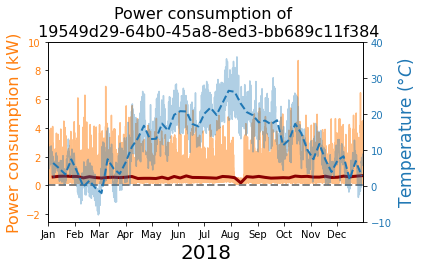

In [290]:
start_date = '2018-01-01 00:00:00'
#end_date = '2019-01-01 23:45:00'
end_date = '2018-12-31 23:45:00'

start_date1 = pd.to_datetime(start_date)
end_date1 = pd.to_datetime(end_date)

# Filter data based on the defined date range
filtered_df = df.loc[start_date:end_date]
f_daily_means = daily_means[start_date:end_date]

# Plotting
fig, ax1 = plt.subplots(facecolor='white')

ax1.set_xlim(start_date1, end_date1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Temperature ($\degree C$)', color='tab:blue', fontsize=17)  # we already handled the x-label with ax1
ax2.plot(filtered_df.index, filtered_df['temp_C'], color='tab:blue',alpha=.35)
ax2.plot(f_daily_means.index, f_daily_means['temp_C'], color='tab:blue', linewidth=2, linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(-10,40)


ax1.set_ylabel('Power consumption (kW)', color='tab:orange', fontsize=16)
ax1.plot(filtered_df.index, filtered_df['kW'], color='tab:orange', alpha=0.5)
ax1.plot(f_daily_means.index, f_daily_means['kW'], color='darkred', alpha=1, linewidth=3)
#ax1.plot(filtered_df.index, filtered_df['rolling_mean_kW'], color='teal', alpha=1, linewidth=1)
ax1.tick_params(axis='y', labelcolor='tab:orange')
ax1.set_ylim(-02.56,10)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f'Power consumption of \n {group_key}', fontsize=16)

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Major ticks at each year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format major ticks as years
ax1.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))  # Minor ticks every three months
ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

   
ax1.text(ax1.get_xlim()[0] + 182.5, ax1.get_ylim()[0] - 2.1, f'{2018}', ha='center', va='center', color='black', fontsize=20)

fig.tight_layout()
ax1.axhline(y=0, color='grey', linestyle='--', linewidth=2)

fig.savefig('average_power_consumption_year_and temperature.pdf')

plt.show()